<a href="https://colab.research.google.com/github/ArtiManral/Projects/blob/main/Students_Result_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("students_score.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,11040.000000,10472.000000,11040.000000,11040.000000,11039.000000
mean,491.028804,2.125000,66.689493,69.441757,68.449316
std,286.041837,1.471642,15.442964,14.747144,15.435190
min,0.000000,0.000000,0.000000,8.000000,6.000000
25%,245.000000,1.000000,56.000000,59.000000,58.000000
50%,488.000000,2.000000,67.000000,70.000000,69.000000
75%,733.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           11040 non-null  int64  
 1   Gender               11040 non-null  object 
 2   EthnicGroup          10375 non-null  object 
 3   ParentEduc           10382 non-null  object 
 4   LunchType            11040 non-null  object 
 5   TestPrep             10381 non-null  object 
 6   ParentMaritalStatus  10605 non-null  object 
 7   PracticeSport        10816 non-null  object 
 8   IsFirstChild         10678 non-null  object 
 9   NrSiblings           10472 non-null  float64
 10  TransportMeans       9900 non-null   object 
 11  WklyStudyHours       10701 non-null  object 
 12  MathScore            11040 non-null  int64  
 13  ReadingScore         11040 non-null  int64  
 14  WritingScore         11039 non-null  float64
dtypes: float64(2), int64(3), object(10)


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,665
ParentEduc,658
LunchType,0
TestPrep,659
ParentMaritalStatus,435
PracticeSport,224
IsFirstChild,362
NrSiblings,568


In [6]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71          74.0  


In [7]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace(" 5 - 10","5 - 10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74.0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75.0


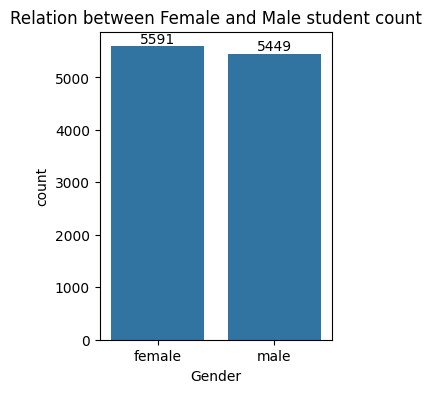

In [8]:
plt.figure(figsize = (3,4))
ax = sns.countplot(data = df,x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Relation between Female and Male student count")
plt.show()

In [9]:
gp = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gp)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.664493     71.435306     70.552156
bachelor's degree   70.554304     73.164119     73.448470
high school         64.259701     67.036318     65.079602
master's degree     72.488712     76.173971     76.857902
some college        66.506947     68.912421     68.194526
some high school    62.806178     65.812656     63.932735


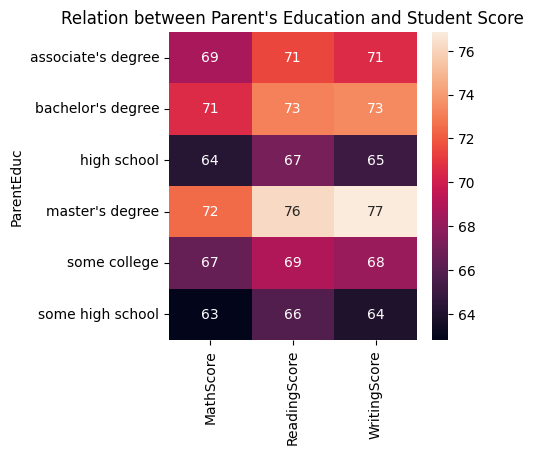

In [10]:
plt.figure(figsize = (4,4))
sns.heatmap(gp, annot = True)
plt.title("Relation between Parent's Education and Student Score")
plt.show()


In [11]:
gp1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gp1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.650255     69.607244     68.776331
married              66.821329     69.562633     68.517720
single               66.131811     68.921875     67.920673
widowed              69.392694     70.744292     69.995434


In [13]:
def new_func():
    plt.figure(figsize = (4,4))
    sns.heatmap(gp1, annot = True)
    plt.title("Relation between Parent's Marital Status and Student Score")
    plt.show()

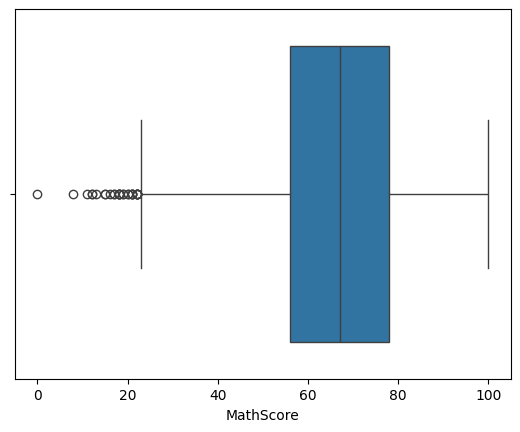

In [14]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

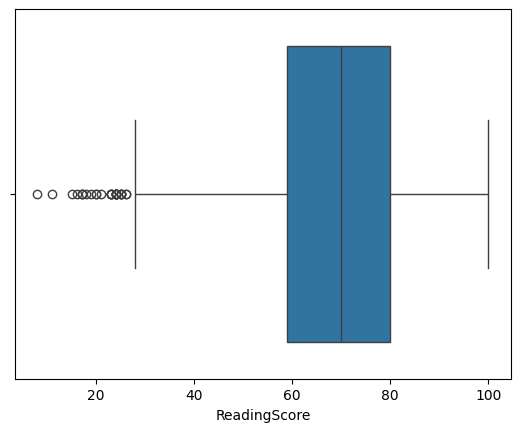

In [15]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

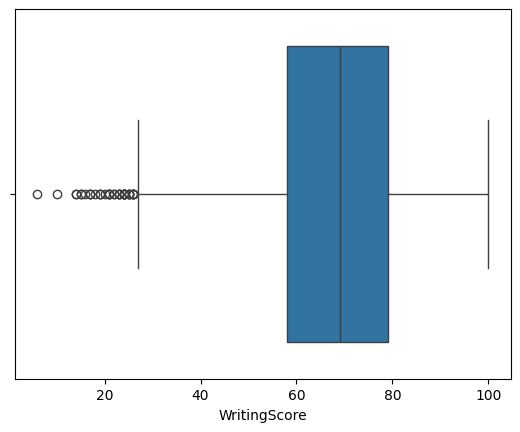

In [16]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

In [17]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[839, 2111, 3277, 2659, 1489]


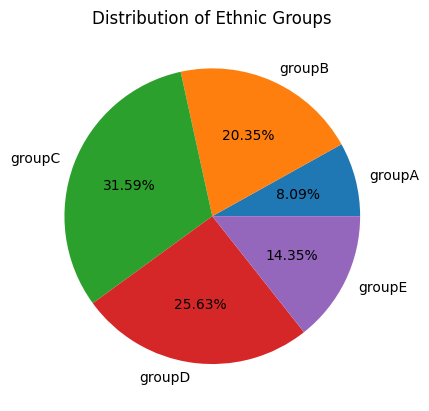

In [18]:
groupA = df.loc[(df["EthnicGroup"]== "group A")].count()
groupB = df.loc[(df["EthnicGroup"]== "group B")].count()
groupC = df.loc[(df["EthnicGroup"]== "group C")].count()
groupD = df.loc[(df["EthnicGroup"]== "group D")].count()
groupE = df.loc[(df["EthnicGroup"]== "group E")].count()

l = ["groupA","groupB","groupC","groupD","groupE"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
print(mlist)
plt.pie(mlist, labels = l,autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '3277'),
 Text(0, 0, '2111'),
 Text(0, 0, '839'),
 Text(0, 0, '2659'),
 Text(0, 0, '1489')]

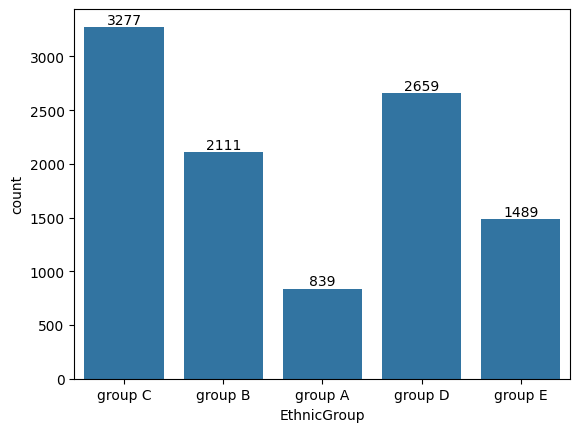

In [19]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])